# Demo of Eigenface

### By Yaohang Li

Demonstration of using PCA to generate eigenfaces from a training set and using eigenfaces to reconstruct human faces.

In [17]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from PIL import Image 

import numpy as np

%matplotlib notebook

In [18]:
pca_size = 600

In [19]:
# Visualization
def plot_gallery(images, h, w, rows=4, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), interpolation='nearest', aspect='auto', cmap=plt.cm.gray)
#         plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

## Load face databases

In [20]:
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=200)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Visualize the data

<IPython.core.display.Javascript object>


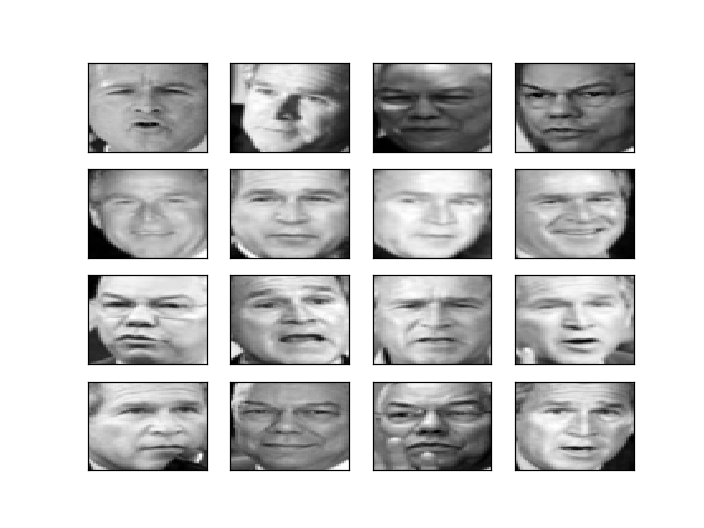

In [21]:
plot_gallery(X_train, h, w)

## Calculate the eigenfaces using PCA

In [22]:
# Compute a PCA 
n_components = pca_size
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Visualize the eigenfaces

<IPython.core.display.Javascript object>


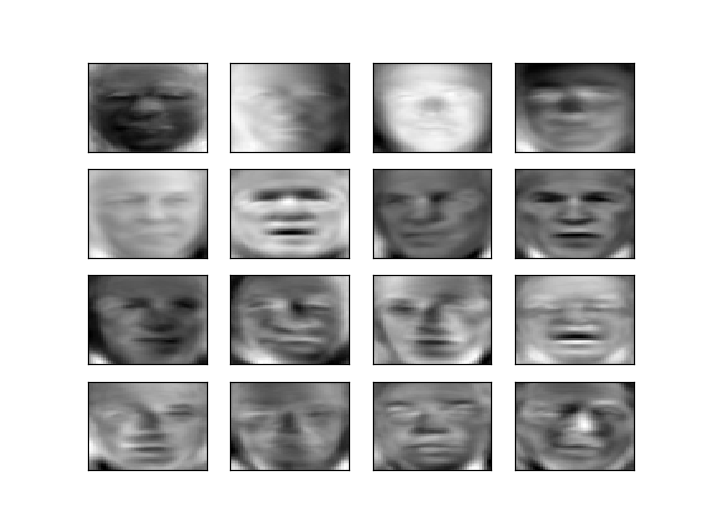

In [23]:
plot_gallery(pca.components_, h, w)

## Regenerate an image from test set using the eigenfaces

<IPython.core.display.Javascript object>


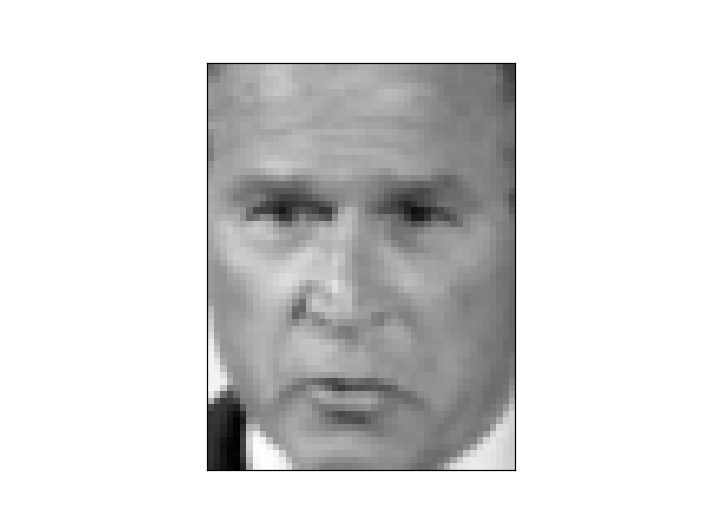

In [24]:
fig = plt.figure()
pix = X_test[0]
plt.imshow(pix.reshape(h, w), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
fig.show()

In [25]:
weights = np.dot(pca.components_, pix)

<IPython.core.display.Javascript object>


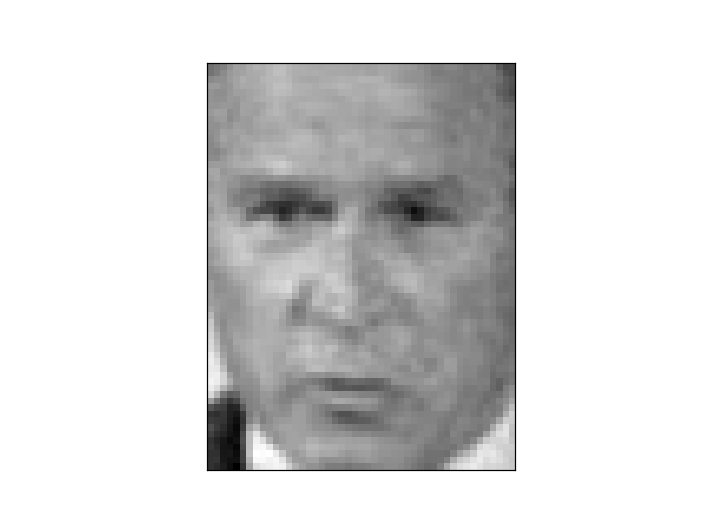

In [26]:
fig = plt.figure()
fig.show()
newconstruct = np.zeros(pix.shape[0])
for i in range(pca_size):
    newconstruct = newconstruct + weights[i]*pca.components_[i]
    if i%10 == 0:
        plt.imshow(newconstruct.reshape(h, w), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
        fig.canvas.draw()

## Regenerate President Trump's image from test set using the eigenfaces

In [27]:
img = Image.open("trump.jpg") # open colour image
img = img.convert('L') # convert image to black and white
img = img.resize((w, h), Image.ANTIALIAS)

<IPython.core.display.Javascript object>


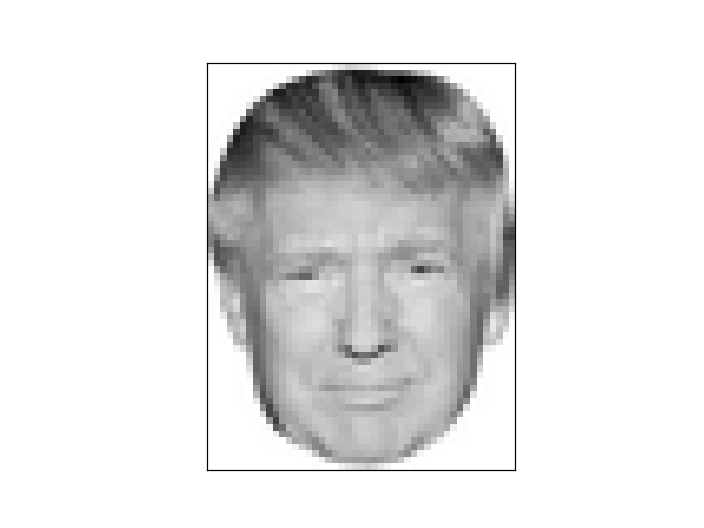

In [28]:
fig = plt.figure()
pix = np.array(img)
plt.imshow(pix.reshape(h, w), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
fig.show()

In [29]:
pix = pix.reshape(-1,)

In [30]:
trump_weights = np.dot(pca.components_, pix)

<IPython.core.display.Javascript object>


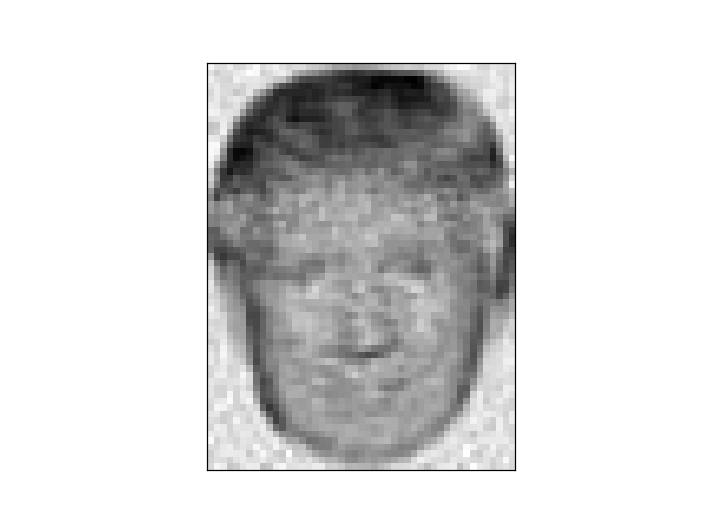

In [31]:
fig = plt.figure()
fig.show()
newconstruct = np.zeros(pix.shape[0])
for i in range(pca_size):
    newconstruct = newconstruct + trump_weights[i]*pca.components_[i]
    if i%10 == 0:
        plt.imshow(newconstruct.reshape(h, w), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
        fig.canvas.draw()

## The differences

<IPython.core.display.Javascript object>


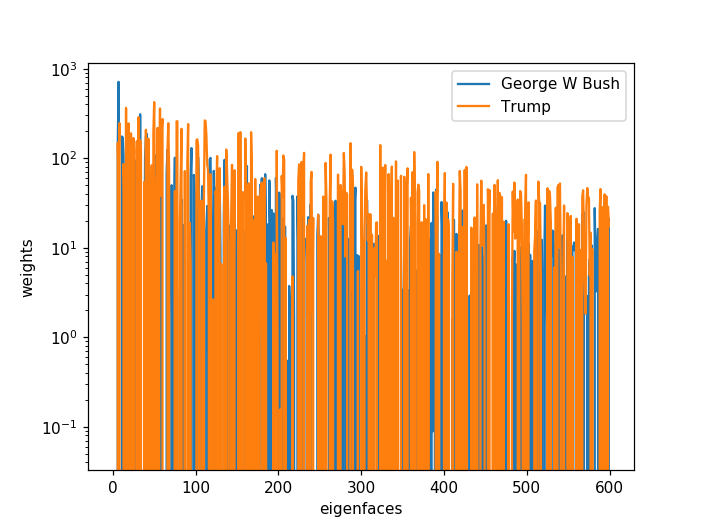

In [32]:
plt.figure()
plt.plot(weights, label = target_names[y_test[0]])
plt.plot(trump_weights, label = "Trump")
plt.xlabel("eigenfaces")
plt.ylabel("weights")
plt.yscale('log')
plt.legend([target_names[y_test[0]], 'Trump'])
plt.show()